In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore")

from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../Datasets/CleanedDS.csv')

In [3]:
df.head()

,CountryCode,Date,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,Population,GDP_Per_Capita,Life_Expectancy,Hospital_Beds_Per_Thousand,Mortality Rate,H5,V1,V3,Mortality_Rate_7day_MA,ConfirmedCases_7day_MA
0,AFG,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,41128772.0,1803.987,64.83,0.50,0.0,0.0,0,0,0.0,0.0
1,NIC,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,6948395.0,5321.444,74.48,0.90,0.0,0.0,0,0,0.0,0.0
2,NLD,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,17564020.0,48472.545,82.28,3.32,0.0,0.0,0,0,0.0,0.0
3,NOR,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,5434324.0,64800.057,82.40,3.60,0.0,0.0,0,0,0.0,0.0
4,NPL,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,30547586.0,2442.804,70.78,0.30,0.0,0.0,0,0,0.0,0.0


In [12]:
countries = ['USA', 'IND', 'CHN', 'GER', 'FRA', 'SWE']
justViewing = df[df['CountryCode'].isin(countries)]
justViewing.shape

(4911, 19)

In [13]:
df.columns

Index(['CountryCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths',
       'MajorityVaccinated', 'StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'Population', 'GDP_Per_Capita',
       'Life_Expectancy', 'Hospital_Beds_Per_Thousand', 'Mortality Rate', 'H5',
       'V1', 'V3', 'Mortality_Rate_7day_MA', 'ConfirmedCases_7day_MA'],
      dtype='object')

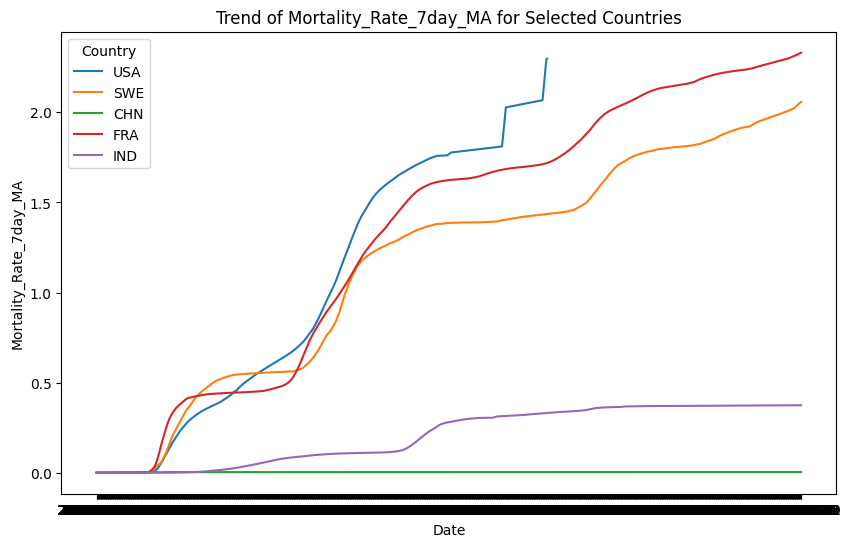

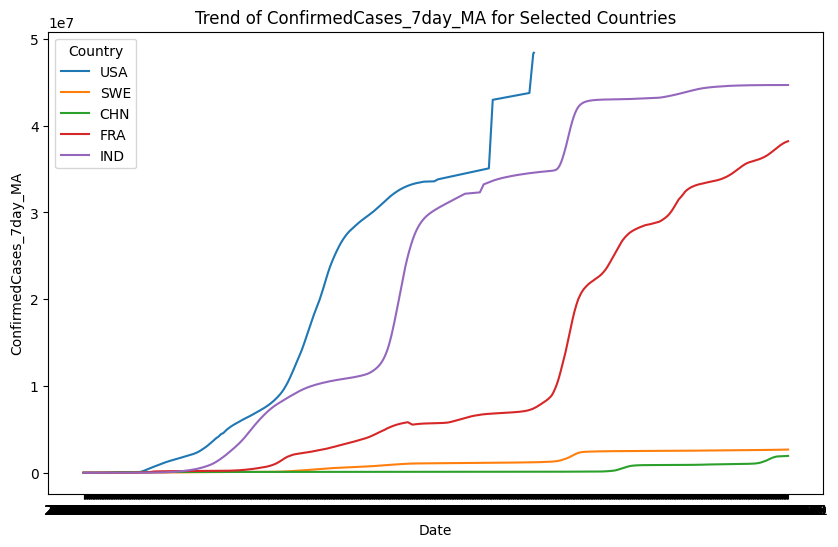

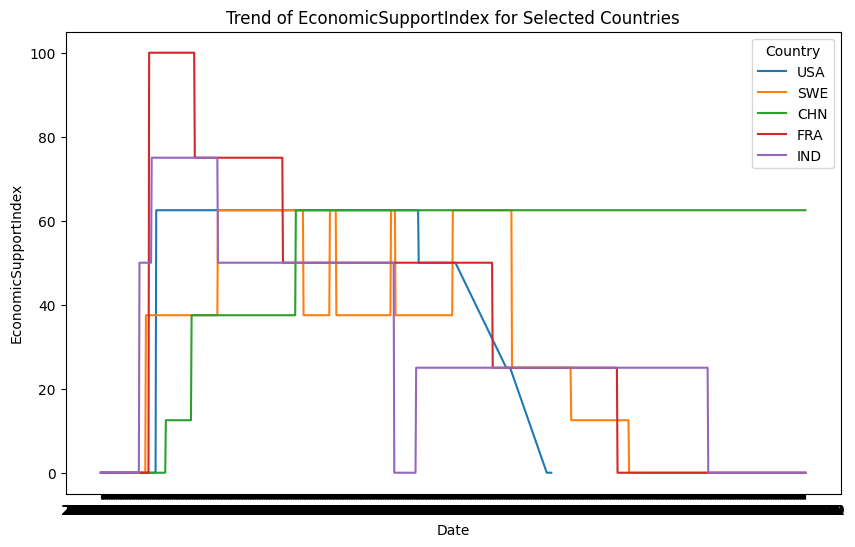

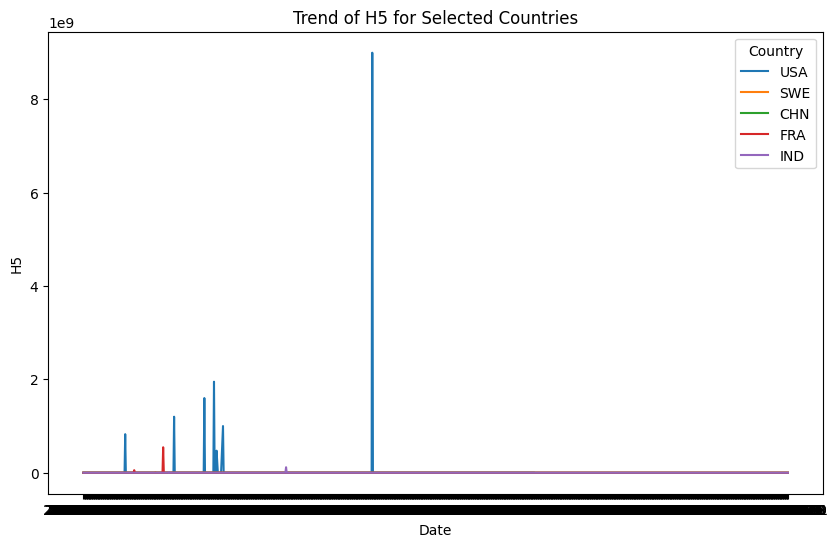

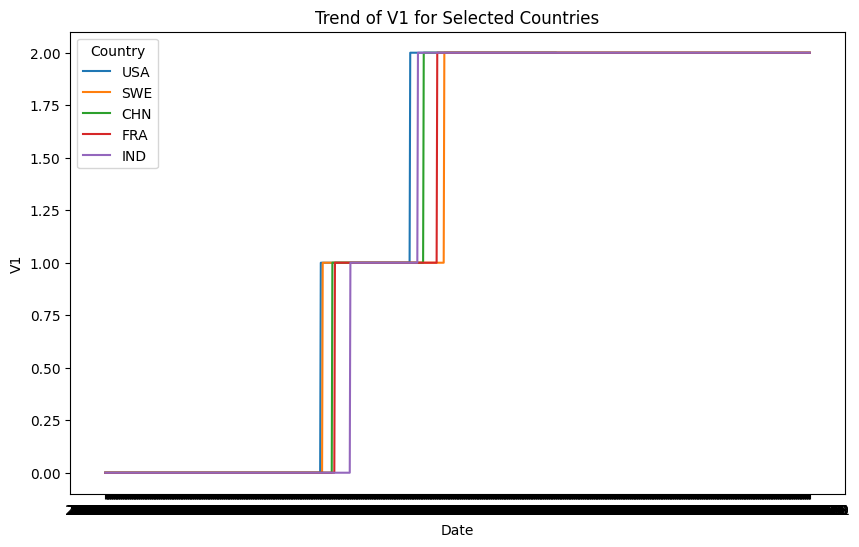

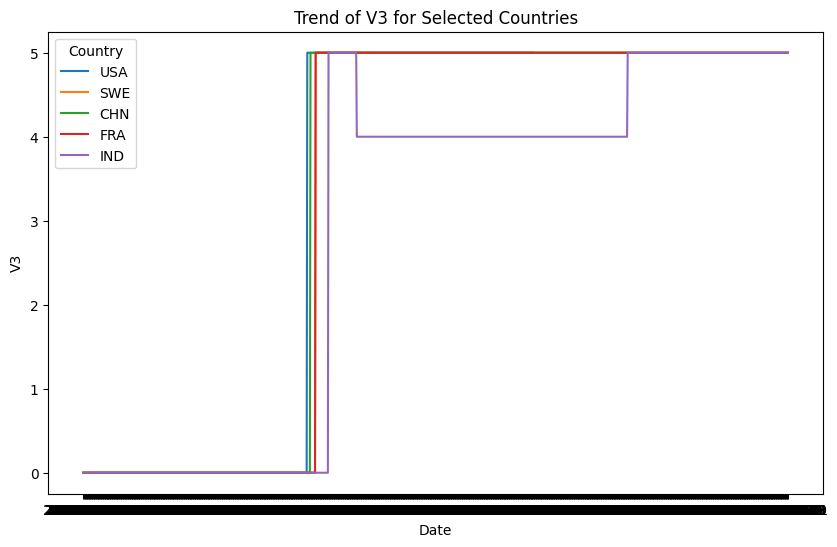

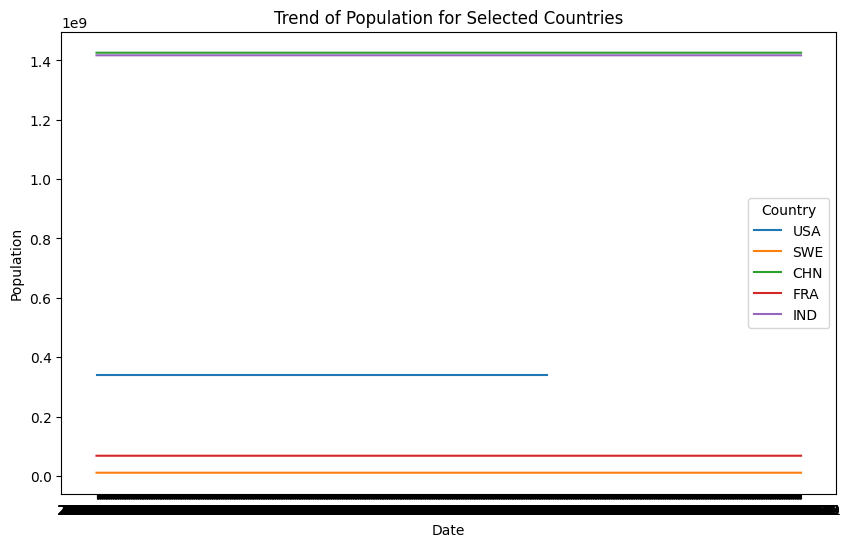

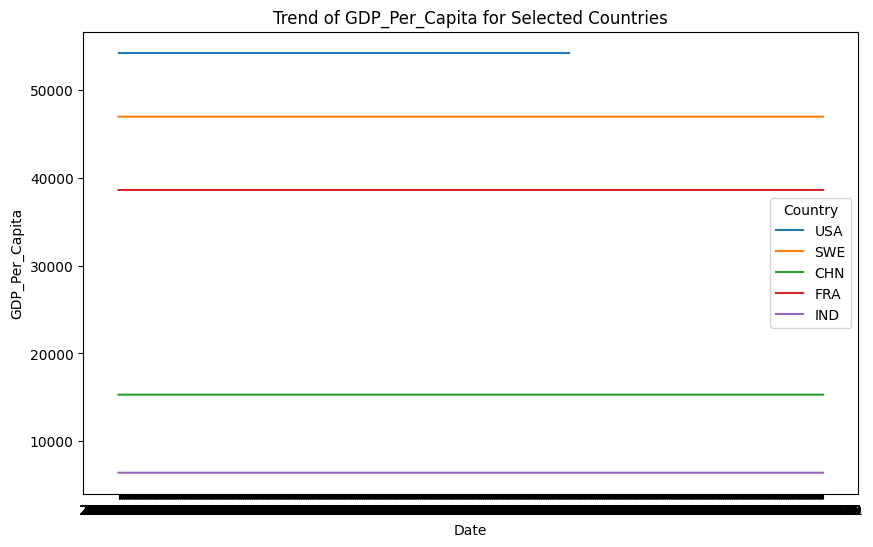

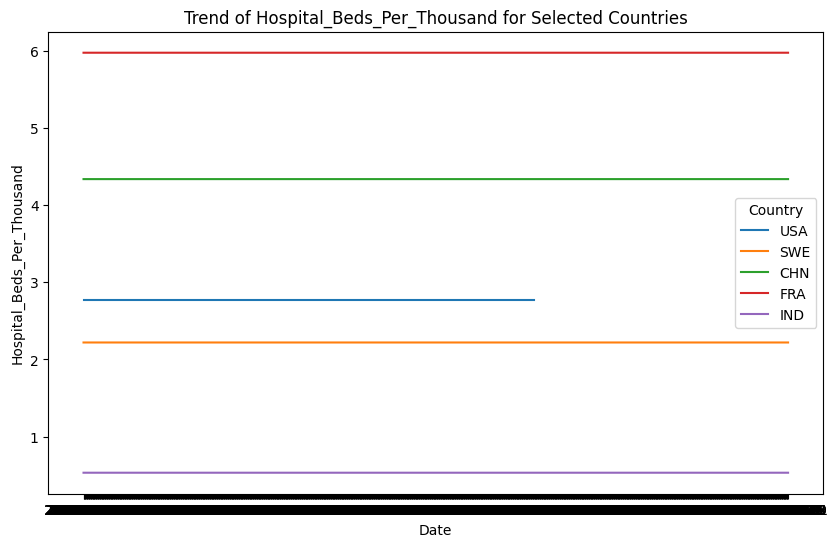

In [22]:
selectedColumns = ['Mortality_Rate_7day_MA', 'ConfirmedCases_7day_MA', 'EconomicSupportIndex', 'H5',
       'V1', 'V3', 'Population', 'GDP_Per_Capita', 'Hospital_Beds_Per_Thousand']

for column in selectedColumns:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.lineplot(data=justViewing, x='Date', y=column, hue='CountryCode')
    plt.title(f'Trend of {column} for Selected Countries')
    plt.xlabel('Date')
    plt.legend(title='Country')
    plt.show()